# **Laboratorio de Machine Learning**

# ***Modelo de Regresión Lineal para aprendizaje supervisado***

# <font color=blue>**Desafío 03**</font>

* Convencer que tenemos buenos criterios
* Explicacion

Utilizando el dataset de la flor de iris (Iris_missing.csv) construya los modelos de aprendizaje utilizando el modelo de regresión lineal (llamado tambien modelo de regresión lineal simple)

In [1]:
# librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

 

recoleccion de los datos y clasificacion a que flores corresponde cada un de los datos

In [44]:
data = pd.read_csv('Iris_missing.csv')

* verificar si hay datos faltantes
* si hay realizar imputacion de datos (opcional)

In [18]:
data

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Imputacion de los datos faltantes

In [63]:
data.isnull().sum()

sepal-length    4
sepal-width     4
petal-length    3
petal-width     3
class           2
dtype: int64

#### Grafico de Datos

In [21]:
bool_series = pd.isnull(data["class"])  
data[bool_series]  

,sepal-length,sepal-width,petal-length,petal-width,class
30,4.8,3.1,1.6,0.2,NaN
110,6.5,3.2,5.1,2.0,NaN


In [22]:
bool_series = pd.isnull(data["sepal-length"])  
data[bool_series] 

,sepal-length,sepal-width,petal-length,petal-width,class
25,NaN,3.0,1.6,0.2,Iris-setosa
44,NaN,NaN,1.9,0.4,Iris-setosa
129,NaN,3.0,5.8,1.6,Iris-virginica
137,NaN,3.1,5.5,NaN,Iris-virginica


In [24]:
bool_series = pd.isnull(data["sepal-width"])  
data[bool_series] 

,sepal-length,sepal-width,petal-length,petal-width,class
8,4.4,NaN,1.4,0.2,Iris-setosa
44,NaN,NaN,1.9,0.4,Iris-setosa
73,6.1,NaN,4.7,1.2,Iris-versicolor
78,6.0,NaN,NaN,1.5,Iris-versicolor


<AxesSubplot:xlabel='class', ylabel='count'>

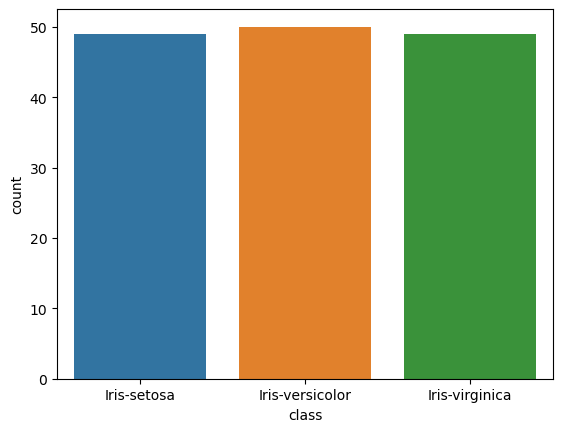

In [45]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.countplot('class', data=data)

In [64]:
# Imputamos las variables numericas con la media
data['sepal-length'].fillna(data['sepal-length'].mean(), inplace=True)
data['sepal-width'].fillna(data['sepal-width'].mean(), inplace=True)
data['petal-length'].fillna(data['petal-length'].mean(), inplace=True)
data['petal-width'].fillna(data['petal-width'].mean(), inplace=True)

# Imputamos la variables categoricas con la moda
data['class'].fillna(data['class'].mode()[0], inplace=True)

In [65]:
data.iloc[[30,110]]

,sepal-length,sepal-width,petal-length,petal-width,class
30,4.8,3.1,1.6,0.2,2.0
110,6.5,3.2,5.1,2.0,2.0


In [66]:
IrisSetona = data[(data['class'] == 'Iris-setosa')]
IrisSetona.describe()

,sepal-length,sepal-width,petal-length,petal-width,class
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [47]:
IrisVersicolor = data[(data['class'] == 'Iris-versicolor')]
IrisVersicolor.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,50.000000,48.000000,48.000000,50.000000
mean,5.936000,2.766667,4.256250,1.326000
std,0.516171,0.319796,0.478431,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.500000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [48]:
IrisVirginica = data[(data['class'] == 'Iris-virginica')]
IrisVirginica.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,47.000000,49.000000,49.000000,46.000000
mean,6.580851,2.969388,5.561224,2.032609
std,0.649293,0.324168,0.553706,0.281310
min,4.900000,2.200000,4.500000,1.400000
25%,6.200000,2.800000,5.100000,1.800000
50%,6.500000,3.000000,5.600000,2.000000
75%,6.900000,3.100000,5.900000,2.300000
max,7.900000,3.800000,6.900000,2.500000


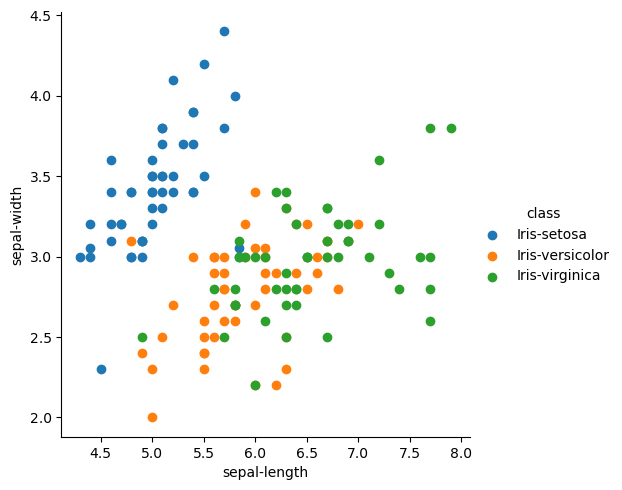

In [43]:
sns.FacetGrid(data, hue='class', size=5)\
    .map(plt.scatter,'sepal-length','sepal-width')\
        .add_legend()

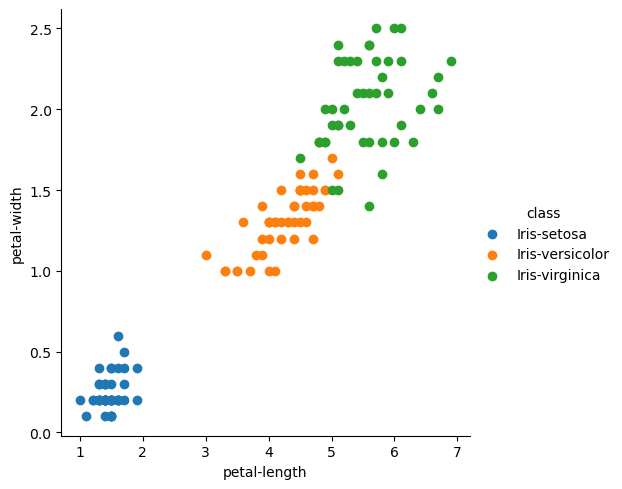

In [49]:
sns.FacetGrid(data, hue='class', size=5)\
    .map(plt.scatter,'petal-length','petal-width')\
        .add_legend()

In [15]:
data.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal-length  150 non-null    float64 
 1   sepal-width   150 non-null    float64 
 2   petal-length  150 non-null    float64 
 3   petal-width   150 non-null    float64 
 4   class         150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [6]:
data["class"]= data["class"].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal-length  146 non-null    float64 
 1   sepal-width   146 non-null    float64 
 2   petal-length  147 non-null    float64 
 3   petal-width   147 non-null    float64 
 4   class         148 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


Codificacion de categorias One - hot

In [10]:
from sklearn.preprocessing import OneHotEncoder

#creamos un encodificacio
codificador = OneHotEncoder()

# creamos un ojeto codificador
codificacion = codificador.fit_transform(data[["class"]])
#print(type(codificacion))
#print(codificacion)
#print(codificacion.toarray())

nueva_data = pd.DataFrame(codificacion.toarray(),columns=codificador.categories_)
print(nueva_data)

    Iris-setosa Iris-versicolor Iris-virginica  NaN
0           1.0             0.0            0.0  0.0
1           1.0             0.0            0.0  0.0
2           1.0             0.0            0.0  0.0
3           1.0             0.0            0.0  0.0
4           1.0             0.0            0.0  0.0
..          ...             ...            ...  ...
145         0.0             0.0            1.0  0.0
146         0.0             0.0            1.0  0.0
147         0.0             0.0            1.0  0.0
148         0.0             0.0            1.0  0.0
149         0.0             0.0            1.0  0.0

[150 rows x 4 columns]


# <font color=blue>**Parte 1**</font>

La columna <font color=red>class</font> (llamada tambien etiquetas) son categorias no numéricas.

Sabiendo que el <font color=red>modelo de regresión lineal</font> trabaja sólo con valores numéricos, haga la conversión correspondiente.

* Solo regresion lineal simple
* Usar una estrategia la que queramos

Cambiamos las categorias de las clases de flores de forma manual
debido a que emplenado la codificacion One-Hot no podriamos ajustarlo a nuestro modelo de regresion lineal simple 

In [52]:
# ....
new_class = {'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}
data['class'].replace(new_class, inplace = True)
data

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.2,1.0
4,5.0,3.6,1.4,0.2,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3.0
146,6.3,2.5,5.0,1.9,3.0
147,6.5,3.0,5.2,2.0,3.0
148,6.2,3.4,5.4,2.3,3.0


# <font color=blue>**Parte 2**</font>

1.   Tome los valores de: 

  X -> sepal-width

  y -> class
2.   Haga la partición de datos en: entrenamiento y test con valores por defecto.

1.   Obtenga el modelo de aprendizaje correspondiente.

2.   Grafique los datos originales y la recta (modelo) obtenido.

4.   Calcule el error cuadratico medio y explique sus resultados.






In [54]:
# librerias necesarias
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [72]:
X = data[['sepal-width']]
y = data['class']

In [73]:
# separa los datos para entrenamiento y para prueba de forma aleatorio al azar
# tamaño de prueba es el 20% de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y) #20%


In [74]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train) 

LinearRegression()

In [75]:
# prediccion con los datos de entrenamiento
y_train_predicted = linear_regression.predict(X_train) 
# prediccion con los datos de prueba
y_test_predicted = linear_regression.predict(X_test)   

# calidad obtenida en el conjunto de datos de entrenamiento
train_MSD = mean_squared_error(y_train, y_train_predicted)
# error cuadratico medio
# calidad obtenida en el conjunto de datos de prueba
test_MSD = mean_squared_error(y_test, y_test_predicted)

print(train_MSD)
print(test_MSD)

0.565384042571487
0.45993193782322284


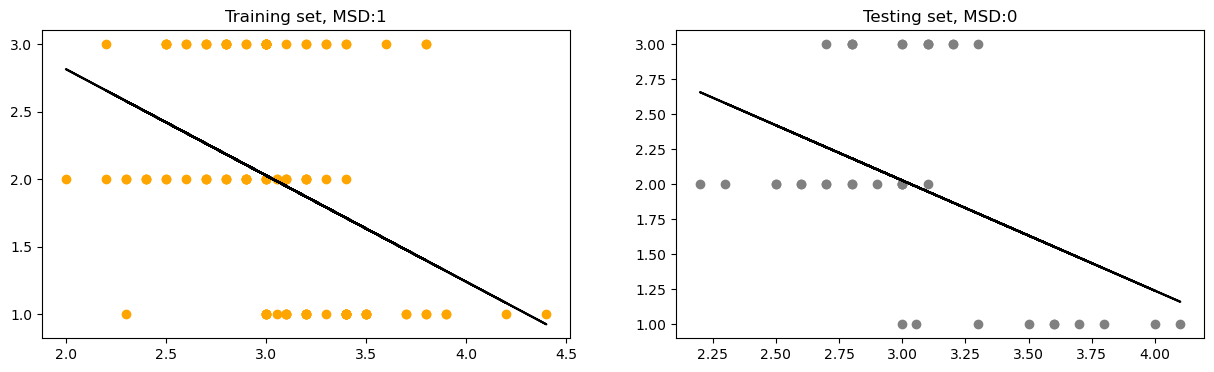

In [76]:
# graficas de datos del entrenamiento y prueba
fig, axs = plt.subplots(1,2, figsize=(15,4)) 
axs[0].scatter(X_train, y_train,  color='orange')
axs[0].plot(X_train, y_train_predicted, color='black')
axs[0].set_title('Training set, MSD:{:.0f}'.format(train_MSD))

axs[1].scatter(X_test, y_test,  color='gray')
axs[1].plot(X_test, y_test_predicted, color='black')
axs[1].set_title('Testing set, MSD:{:.0f}'.format(test_MSD))

plt.show()

# <font color=blue>**Parte 3**</font>



1.   Tome los valores de:

  X -> petal-length

  y -> class
2.   Haga la partición de datos en:

  Datos de entrenamiento 80% y

  Datos de prueba 20%.

1.   Obtenga el modelo de aprendizaje correspondiente.
2.   Grafique los datos originales y la recta (modelo) obtenido.

1.   Calcule el error cuadratico medio y explique sus resultados.







In [77]:
X = data[['petal-length']]
y = data['class']

In [78]:
# separa los datos para entrenamiento y para prueba de forma aleatorio al azar
# tamaño de prueba es el 20% de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y) #20%


In [79]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train) 

LinearRegression()

In [80]:
# prediccion con los datos de entrenamiento
y_train_predicted = linear_regression.predict(X_train) 
# prediccion con los datos de prueba
y_test_predicted = linear_regression.predict(X_test)   

# calidad obtenida en el conjunto de datos de entrenamiento
train_MSD = mean_squared_error(y_train, y_train_predicted)
# error cuadratico medio
# calidad obtenida en el conjunto de datos de prueba
test_MSD = mean_squared_error(y_test, y_test_predicted)

print(train_MSD)
print(test_MSD)

0.07768224112520915
0.08478898271934586


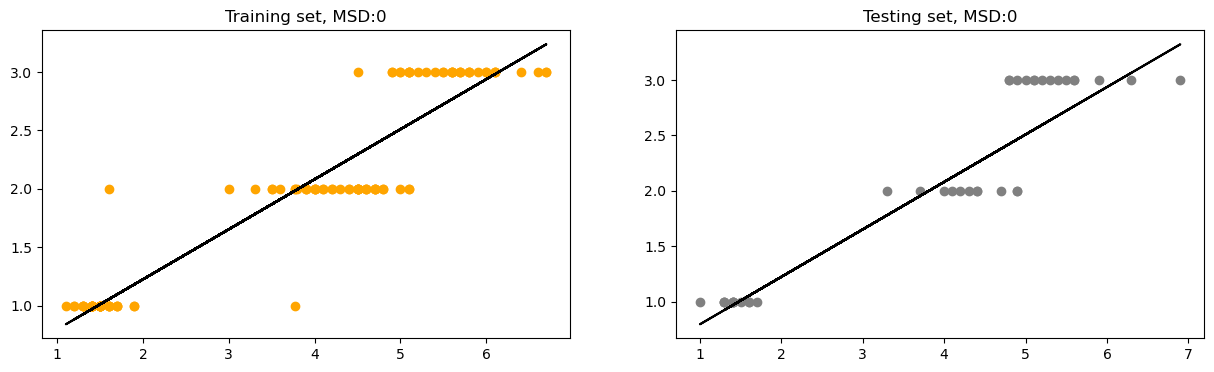

In [81]:
# graficas de datos del entrenamiento y prueba
fig, axs = plt.subplots(1,2, figsize=(15,4)) 
axs[0].scatter(X_train, y_train,  color='orange')
axs[0].plot(X_train, y_train_predicted, color='black')
axs[0].set_title('Training set, MSD:{:.0f}'.format(train_MSD))

axs[1].scatter(X_test, y_test,  color='gray')
axs[1].plot(X_test, y_test_predicted, color='black')
axs[1].set_title('Testing set, MSD:{:.0f}'.format(test_MSD))

plt.show()

# <font color=blue>**Parte 4**</font>

Observando los resultados de la <font color=blue>Parte 2</font> y <font color=blue>Parte 3</font>, qué puede concluir?

In [ ]:
# escriba i/o explique sus conclusiones en día de la sustentación/defensa del desafío
# ....
